In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
# from mpl_toolkits.mplot3d import axes3d
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv(r'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

In [ ]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [ ]:
series=df['close'].values.reshape(-1,1)
series

array([[28.185],
       [28.07 ],
       [28.13 ],
       ...,
       [54.69 ],
       [55.61 ],
       [54.46 ]])

In [ ]:
series=df['close'].values.reshape(-1,1)
scaler=StandardScaler()
scaler.fit(series[:len(series)//2])
series=scaler.transform(series).flatten()

In [ ]:
series

array([-1.62500489, -1.64174953, -1.6330132 , ...,  2.2342704 ,
        2.36822751,  2.20078112])

In [ ]:
### build the dataset # let's see if we can use T past values to predict the next value
T = 10 
D = 1 
X = [] 
Y = [] 
for t in range(len(series) - T):
   x = series[t:t+T] 
   X.append(x) 
   y = series[t+T] 
   Y.append(y) 
X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D 
Y = np.array(Y)
N = len(X) 
print("X.shape", X.shape, "Y.shape", Y.shape) 

X.shape (1249, 10, 1) Y.shape (1249,)


In [ ]:
i=tf.keras.layers.Input(shape=(T,1))
x=tf.keras.layers.LSTM(5)(i)
# x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(1)(x)
model=tf.keras.Model(i,x)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm_1 (LSTM)               (None, 5)                 140       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='mse')


In [ ]:
r=model.fit(X[:-N//2],Y[:-N//2],epochs=50,validation_data=(X[-N//2:],Y[-N//2:]),verbose=2)

Epoch 1/50
20/20 - 4s - loss: 0.1959 - val_loss: 0.1758 - 4s/epoch - 194ms/step
Epoch 2/50
20/20 - 0s - loss: 0.0133 - val_loss: 0.0441 - 273ms/epoch - 14ms/step
Epoch 3/50
20/20 - 0s - loss: 0.0071 - val_loss: 0.0335 - 351ms/epoch - 18ms/step
Epoch 4/50
20/20 - 0s - loss: 0.0061 - val_loss: 0.0211 - 255ms/epoch - 13ms/step
Epoch 5/50
20/20 - 0s - loss: 0.0062 - val_loss: 0.0228 - 211ms/epoch - 11ms/step
Epoch 6/50
20/20 - 0s - loss: 0.0055 - val_loss: 0.0209 - 222ms/epoch - 11ms/step
Epoch 7/50
20/20 - 0s - loss: 0.0059 - val_loss: 0.0386 - 198ms/epoch - 10ms/step
Epoch 8/50
20/20 - 0s - loss: 0.0064 - val_loss: 0.0202 - 216ms/epoch - 11ms/step
Epoch 9/50
20/20 - 0s - loss: 0.0069 - val_loss: 0.0201 - 185ms/epoch - 9ms/step
Epoch 10/50
20/20 - 0s - loss: 0.0064 - val_loss: 0.0210 - 212ms/epoch - 11ms/step
Epoch 11/50
20/20 - 0s - loss: 0.0061 - val_loss: 0.0201 - 203ms/epoch - 10ms/step
Epoch 12/50
20/20 - 0s - loss: 0.0065 - val_loss: 0.0326 - 192ms/epoch - 10ms/step
Epoch 13/50
20/2

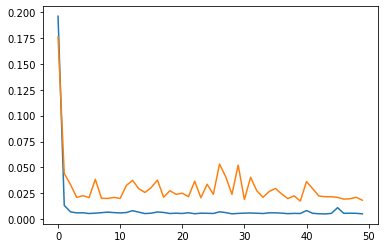

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')

40/40 [==============================] - 0s 4ms/step


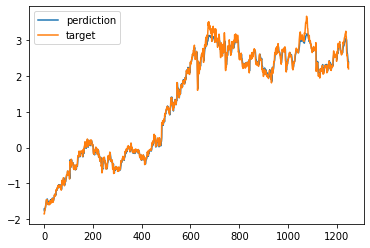

In [ ]:
output=model.predict(X)[:,0]
plt.plot(output,label='perdiction')
plt.plot(Y,label='target')
plt.legend()

1/1 [==============================] - 0s 27ms/step


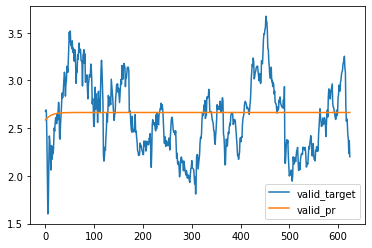

In [ ]:
valid_target=Y[-N//2:]
valid_pr=[]
last_x=X[-N//2]
while len(valid_pr)<len(valid_target):
  p=model.predict(last_x.reshape(1,T,1))[0,0]
  valid_pr.append(p)
  last_x=np.roll(last_x,-1)
  last_x[-1]=p
plt.plot(valid_target,label='valid_target')
plt.plot(valid_pr,label='valid_pr')
plt.legend()


In [ ]:
df['prevclose']=df['close'].shift(1)
df.head()

,date,open,high,low,close,volume,Name,prevclose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [ ]:
df['prevclose']=df['close'].shift(1)
df['return']=(df['close']-df['prevclose'])/df['prevclose']

In [ ]:
df.head()

,date,open,high,low,close,volume,Name,prevclose,return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


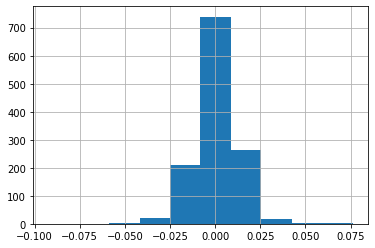

In [ ]:
df['return'].hist()
plt.show()

In [ ]:
series=df['return'].values[1:].reshape(-1,1)
scaler=StandardScaler()
scaler.fit(series[:len(series)//2])
series=scaler.transform(series).flatten()

In [ ]:
T = 10 
D = 1 
X = [] 
Y = [] 
for t in range(len(series) - T):
   x = series[t:t+T] 
   X.append(x) 
   y = series[t+T] 
   Y.append(y) 
X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D 
Y = np.array(Y)
N = len(X) 
print("X.shape", X.shape, "Y.shape", Y.shape) 

X.shape (1248, 10, 1) Y.shape (1248,)


In [ ]:
i=tf.keras.layers.Input(shape=(T,1))
x=tf.keras.layers.LSTM(5)(i)
# x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(1)(x)
model=tf.keras.Model(i,x)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm_5 (LSTM)               (None, 5)                 140       
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='mse')


In [ ]:
r=model.fit(X[:-N//2],Y[:-N//2],epochs=50,validation_data=(X[-N//2:],Y[-N//2:]),verbose=2)


Epoch 1/50
20/20 - 3s - loss: 0.9996 - val_loss: 1.1414 - 3s/epoch - 154ms/step
Epoch 2/50
20/20 - 0s - loss: 0.9871 - val_loss: 1.1433 - 228ms/epoch - 11ms/step
Epoch 3/50
20/20 - 0s - loss: 0.9849 - val_loss: 1.1358 - 208ms/epoch - 10ms/step
Epoch 4/50
20/20 - 0s - loss: 0.9844 - val_loss: 1.1369 - 216ms/epoch - 11ms/step
Epoch 5/50
20/20 - 0s - loss: 0.9842 - val_loss: 1.1469 - 212ms/epoch - 11ms/step
Epoch 6/50
20/20 - 0s - loss: 0.9828 - val_loss: 1.1382 - 213ms/epoch - 11ms/step
Epoch 7/50
20/20 - 0s - loss: 0.9877 - val_loss: 1.1338 - 206ms/epoch - 10ms/step
Epoch 8/50
20/20 - 0s - loss: 0.9833 - val_loss: 1.1579 - 196ms/epoch - 10ms/step
Epoch 9/50
20/20 - 0s - loss: 0.9819 - val_loss: 1.1352 - 213ms/epoch - 11ms/step
Epoch 10/50
20/20 - 0s - loss: 0.9812 - val_loss: 1.1425 - 218ms/epoch - 11ms/step
Epoch 11/50
20/20 - 0s - loss: 0.9815 - val_loss: 1.1493 - 214ms/epoch - 11ms/step
Epoch 12/50
20/20 - 0s - loss: 0.9856 - val_loss: 1.1485 - 220ms/epoch - 11ms/step
Epoch 13/50
20/

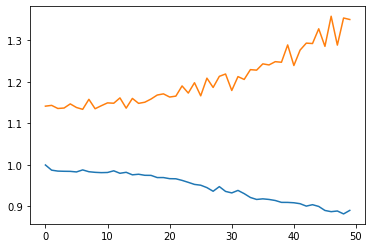

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.show()

39/39 [==============================] - 1s 4ms/step


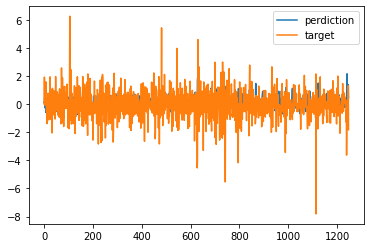

In [ ]:
output=model.predict(X)[:,0]
plt.plot(output,label='perdiction')
plt.plot(Y,label='target')
plt.legend()

1/1 [==============================] - 0s 26ms/step


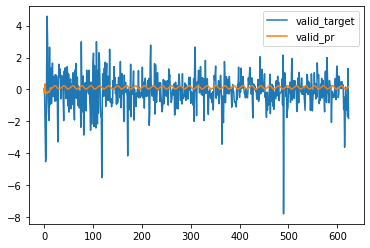

In [ ]:
valid_target=Y[-N//2:]
valid_pr=[]
last_x=X[-N//2]
while len(valid_pr)<len(valid_target):
  p=model.predict(last_x.reshape(1,T,1))[0,0]
  valid_pr.append(p)
  last_x=np.roll(last_x,-1)
  last_x[-1]=p
plt.plot(valid_target,label='valid_target')
plt.plot(valid_pr,label='valid_pr')
plt.legend()


In [ ]:
input_data=df[['close','high','low','open','volume']].values
target=df['return'].values

In [ ]:
T=10 # 10 step further
D=input_data.shape[1]
N=len(input_data)-T #len(input_data) without 10 last row

In [ ]:
n_train=len(input_data)*2//3
scaler=StandardScaler()
scaler.fit(input_data[:n_train+T])
input_data=scaler.transform(input_data)

In [ ]:
input_data[0:10]

array([[-1.56438486, -1.57081711, -1.57170368, -1.58942908, -0.4813086 ],
       [-1.57558064, -1.57708484, -1.57071748, -1.55633563, -0.88449196],
       [-1.56973937, -1.57563844, -1.56627961, -1.58164238, -0.11862304],
       [-1.5906706 , -1.57997764, -1.58846899, -1.55925564, -0.5109671 ],
       [-1.60430023, -1.6113163 , -1.59586545, -1.60451579, -0.06285912],
       [-1.66319974, -1.61661976, -1.65405094, -1.60062245,  2.15640661],
       [-1.65784524, -1.66917228, -1.6614474 , -1.66145598,  0.62029016],
       [-1.71333734, -1.65808322, -1.70286758, -1.64977594,  0.79016152],
       [-1.71139025, -1.7159392 , -1.73541201, -1.72423619,  1.1300847 ],
       [-1.67147488, -1.68845761, -1.69793661, -1.69357609,  0.55497747]])

In [ ]:
np.zeros((n_train,T,D))[0]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
target[10]

-0.017721986339302213

In [ ]:
(target[11]>0)

True

In [ ]:
x_train=np.zeros((n_train,T,D))
y_train=np.zeros(n_train)
for t in range(n_train):
  x_train[t,:,:]=input_data[t:t+T]
  y_train[t]=(target[t+T]>0)


In [ ]:
x_test=np.zeros((N-n_train,T,D))
y_test=np.zeros((N-n_train))
for u in range(N-n_train):
  t=u+n_train
  x_test[u,:,:]=input_data[t:t+T]
  y_test[u]=(target[t+T]>0)

In [ ]:
i=tf.keras.layers.Input(shape=(T,D))
x=tf.keras.layers.LSTM(5)(i)
# x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.Model(i,x)
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 10, 5)]           0         
                                                                 
 lstm_8 (LSTM)               (None, 5)                 220       
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy'])
r=model.fit(x_train,y_train,batch_size=50,epochs=300,validation_data=(x_test,y_test),verbose=2)



Epoch 1/300
17/17 - 4s - loss: 0.6851 - accuracy: 0.5697 - val_loss: 0.6937 - val_accuracy: 0.5098 - 4s/epoch - 207ms/step
Epoch 2/300
17/17 - 0s - loss: 0.6848 - accuracy: 0.5614 - val_loss: 0.6937 - val_accuracy: 0.5098 - 169ms/epoch - 10ms/step
Epoch 3/300
17/17 - 0s - loss: 0.6848 - accuracy: 0.5745 - val_loss: 0.6934 - val_accuracy: 0.5146 - 165ms/epoch - 10ms/step
Epoch 4/300
17/17 - 0s - loss: 0.6845 - accuracy: 0.5721 - val_loss: 0.6933 - val_accuracy: 0.5244 - 176ms/epoch - 10ms/step
Epoch 5/300
17/17 - 0s - loss: 0.6843 - accuracy: 0.5745 - val_loss: 0.6935 - val_accuracy: 0.5122 - 208ms/epoch - 12ms/step
Epoch 6/300
17/17 - 0s - loss: 0.6846 - accuracy: 0.5745 - val_loss: 0.6931 - val_accuracy: 0.5220 - 171ms/epoch - 10ms/step
Epoch 7/300
17/17 - 0s - loss: 0.6842 - accuracy: 0.5721 - val_loss: 0.6932 - val_accuracy: 0.5195 - 205ms/epoch - 12ms/step
Epoch 8/300
17/17 - 0s - loss: 0.6842 - accuracy: 0.5685 - val_loss: 0.6936 - val_accuracy: 0.5317 - 169ms/epoch - 10ms/step
Ep